# 1. Importação de Bibliotecas e carregamento de dados

## 1.1. Bibliotecas

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc





## 1.2. Carregamento de dados

In [2]:
df = pd.read_csv('data/raw/Obesity.csv')

In [3]:
print(df.head())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe

# 2. Tratamento dos dados

## 2.1. Checagem iniciais

In [4]:
# Verificação da quantidade de linhas e colunas
df.shape

(2111, 17)

In [5]:
# Verificação das informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [6]:
# Verificação de valores nulos
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 2.2. Ajuste e padronização das features

In [7]:
# Renoemando colunas para facilitar a leitura e manipulação dos dados
df_tratado = df.rename(columns ={
    'Gender': 'genero',                                 # Male ou Female
    'Age': 'idade',                                     # Idade em anos
    'Height': 'altura',                                 # Altura em metros
    'Weight': 'peso',                                   # Peso em kg
    'family_history': 'historico_familiar_sobrepeso',   # Histórico familiar de sobrepeso? (yes, no)
    'FAVC': 'consumo_alimentos_caloricos',              # Consome frequentemente alimentos com alto teor calórico?
    'FCVC': 'consumo_vegetais',                         # Qual a frequência de consumo de vegetais? Escala de 1-raramente, 2-as_vezes,  3-sempre
    'NCP': 'refeicoes_por_dia',                         # Número de refeições por dia? Escala de 1-uma_refeicao_dia, 2-duas_refeicao_dia,  3  tres_refeicao_dia,  4-quatro_refeicao_dia
    'CAEC': 'lanches_entre_refeicoes',                  # Alimenta-se entre refeições? (nao, as_vezes, frequentemente, sempre)
    'SMOKE': 'fumante',                                 # Você é fumante? (yes, no)
    'CH2O': 'consumo_agua_por_dia',                     # Consumo de água por dia? Escala de 1 a 3
    'SCC': 'monitora_calorias',                         # Monitora o consumo de calorias? (yes, no)
    'FAF': 'atividade_fisica_semana',                   # Frequência de atividade física por semana? Escala de 0 a 3
    'TUE': 'tempo_eletronicos_por_dia',                 # Tempo gasto em dispositivos eletrônicos por dia? Escala de 0 a 2
    'CALC': 'consumo_alcoolico',                        # Consumo de bebidas alcoólicas? (no, sometimes, frequently, always)
    'MTRANS': 'meio_transporte',                        # Meio de transporte utilizado principalmente (automobile, bike, motorbike, public_transportation, walking)
    'Obesity': 'obesidade'                              # Nível de obesidade (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III)
})

## 2.3. Verificação de conteúdo das features e ajustes

In [8]:
# Conferindo valores das features
df_tratado.nunique()

genero                             2
idade                           1402
altura                          1574
peso                            1525
historico_familiar_sobrepeso       2
consumo_alimentos_caloricos        2
consumo_vegetais                 810
refeicoes_por_dia                635
lanches_entre_refeicoes            4
fumante                            2
consumo_agua_por_dia            1268
monitora_calorias                  2
atividade_fisica_semana         1190
tempo_eletronicos_por_dia       1129
consumo_alcoolico                  4
meio_transporte                    5
obesidade                          7
dtype: int64

In [9]:
# Ajuste de valores das features conforme dicionário orienta.
df_tratado['consumo_vegetais']  = df_tratado['consumo_vegetais'].round(0).astype(int)
df_tratado['refeicoes_por_dia']  = df_tratado['refeicoes_por_dia'].round(0).astype(int)
df_tratado['consumo_agua_por_dia']  = df_tratado['consumo_agua_por_dia'].round(0).astype(int)
df_tratado['atividade_fisica_semana']  = df_tratado['atividade_fisica_semana'].round(0).astype(int)
df_tratado['tempo_eletronicos_por_dia']  = df_tratado['tempo_eletronicos_por_dia'].round(0).astype(int)

## 2.4. Modificação dos dados

### 2.4.1 Binarização de features

In [10]:
# Yes = 1 / No = 0
df_tratado['historico_familiar_sobrepeso'] = df_tratado['historico_familiar_sobrepeso'].map({'yes': 1, 'no': 0})
df_tratado['consumo_alimentos_caloricos'] = df_tratado['consumo_alimentos_caloricos'].map({'yes': 1, 'no': 0})
df_tratado['fumante'] = df_tratado['fumante'].map({'yes': 1, 'no': 0})
df_tratado['monitora_calorias'] = df_tratado['monitora_calorias'].map({'yes': 1, 'no': 0})

In [11]:
# Binarização de gênero
df_tratado['genero'] = df_tratado['genero'].map({'Female': 0, 'Male': 1})

### 2.4.2 Mapeando features

In [12]:
map_vegetais = {1: 'raramente', 2: 'as_vezes', 3: 'sempre'}
map_refeicoes = {1: 'uma_refeicao_dia', 2: 'duas_refeicao_dia', 3: 'tres_refeicao_dia', 4: 'quatro_ou_mais_refeicao_dia'}
map_agua = {1: 'menor_um_litro', 2: 'entre_um_dois_litro', 3: 'maior_dois_litro'}
map_atividade = {0: 'nenhuma', 1: 'uma_a_duas_por_semana', 2: 'tres_a_quatro_por_semana', 3: 'cinco_ou_mais_por_semana'}
map_tempo_eletronicos = {0: 'menor_igual_duas_hora_dia', 1: 'tres_a_cinco_hora_dia', 2: 'maior_cinco_hora_dia'}


df_tratado['consumo_vegetais'] = df_tratado['consumo_vegetais'].map(map_vegetais)
df_tratado['refeicoes_por_dia'] = df_tratado['refeicoes_por_dia'].map(map_refeicoes)
df_tratado['consumo_agua_por_dia'] = df_tratado['consumo_agua_por_dia'].map(map_agua)
df_tratado['atividade_fisica_semana'] = df_tratado['atividade_fisica_semana'].map(map_atividade)
df_tratado['tempo_eletronicos_por_dia'] = df_tratado['tempo_eletronicos_por_dia'].map(map_tempo_eletronicos)


## 2.5. Criações de features

In [13]:
# IMC
df_tratado['imc'] = (df_tratado['peso'] / (df_tratado['altura'] ** 2)).round(2)

In [14]:
# verificar minimo e maximo de imc cada categoria de obesidade
df_tratado.groupby('obesidade')['imc'].agg(['min', 'max'])

,min,max
obesidade,,
Insufficient_Weight,13.00,19.08
Normal_Weight,18.49,24.91
Obesity_Type_I,29.91,35.17
Obesity_Type_II,34.05,39.79
Obesity_Type_III,36.77,50.81
Overweight_Level_I,22.83,28.77
Overweight_Level_II,25.71,30.36


- Classificação acima "bate" com métricas encontradas online. 

IMC (kg/m²),Classificação Clínica,Categoria no Dataset,Grau de Obesidade

"< 18,5",Abaixo do Peso,Insufficient_Weight,-

"18,5 - 24,9",Peso Normal,Normal_Weight,0

"25,0 - 29,9",Sobrepeso,Overweight_Level_I / II,1

"30,0 - 34,9",Obesidade Grau I,Obesity_Type_I,2

"35,0 - 39,9",Obesidade Grau II,Obesity_Type_II,2

"> 40,0",Obesidade Grau III,Obesity_Type_III,3


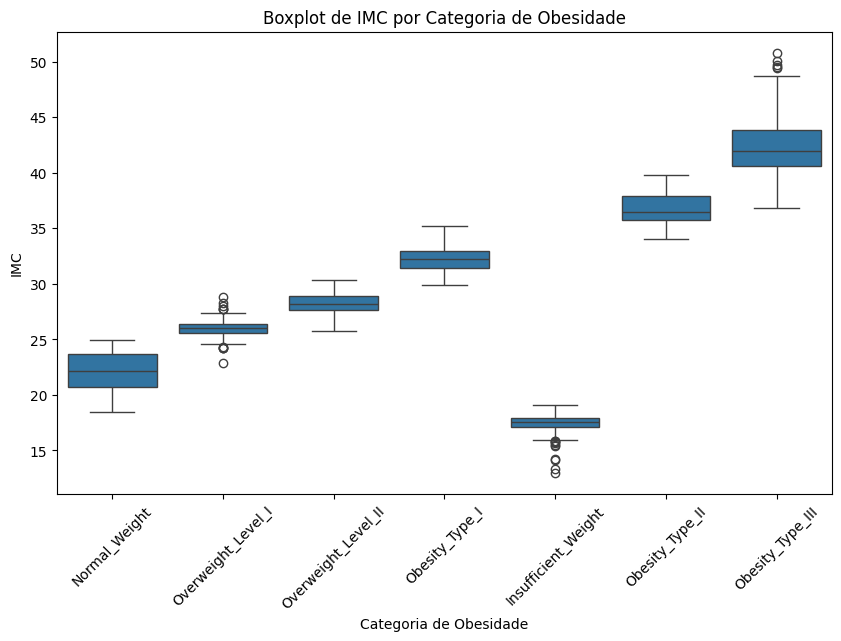

In [15]:
# Bloxplot de imc por categoria de obesidade, verificar outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesidade', y='imc', data=df_tratado)
plt.title('Boxplot de IMC por Categoria de Obesidade')
plt.xlabel('Categoria de Obesidade')
plt.xticks(rotation=45)
plt.ylabel('IMC')
plt.show()

In [16]:
# "Novo target" risco obesidade, verifica o nível de obesidade e fatores de risco considerados de alto impacto que incrementam risco.
def risco_obesidade(row):
    if (
        row['obesidade'] in (
            'Overweight_Level_I',
            'Overweight_Level_II',
            'Obesity_Type_I',
            'Obesity_Type_II',
            'Obesity_Type_III'
        )
        and (
            row['imc'] > 25
            or row['atividade_fisica_semana'] == 'nenhuma'
            or row['historico_familiar_sobrepeso'] == 1
            or row['consumo_alimentos_caloricos'] == 1
            
        )
    ):
        return 1  # risco de obesidade
    else:
        return 0  # sem risco imediato

df_tratado['risco_obesidade'] = df_tratado.apply(risco_obesidade, axis=1)

## 2.6. Reordenando features

In [17]:
# Mudando a ordem das colunas [num, bin, cat, target]
num_features = ['idade', 'altura', 'peso', 'imc']
bin_features = ['genero', 'historico_familiar_sobrepeso', 
                'consumo_alimentos_caloricos',
                'fumante', 'monitora_calorias']
cat_features = ['consumo_vegetais', 'refeicoes_por_dia',
                'lanches_entre_refeicoes',
                'consumo_agua_por_dia',
                'atividade_fisica_semana',
                'tempo_eletronicos_por_dia',
                'consumo_alcoolico', 'meio_transporte']
drops_features = ['obesidade']
target = ['risco_obesidade']



cols = num_features + bin_features + cat_features + drops_features + target
df_tratado = df_tratado[cols]

In [18]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         2111 non-null   float64
 1   altura                        2111 non-null   float64
 2   peso                          2111 non-null   float64
 3   imc                           2111 non-null   float64
 4   genero                        2111 non-null   int64  
 5   historico_familiar_sobrepeso  2111 non-null   int64  
 6   consumo_alimentos_caloricos   2111 non-null   int64  
 7   fumante                       2111 non-null   int64  
 8   monitora_calorias             2111 non-null   int64  
 9   consumo_vegetais              2111 non-null   object 
 10  refeicoes_por_dia             2111 non-null   object 
 11  lanches_entre_refeicoes       2111 non-null   object 
 12  consumo_agua_por_dia          2111 non-null   object 
 13  ati

In [19]:
df_tratado.head()

,idade,altura,peso,imc,genero,historico_familiar_sobrepeso,consumo_alimentos_caloricos,fumante,monitora_calorias,consumo_vegetais,refeicoes_por_dia,lanches_entre_refeicoes,consumo_agua_por_dia,atividade_fisica_semana,tempo_eletronicos_por_dia,consumo_alcoolico,meio_transporte,obesidade,risco_obesidade
0,21.0,1.62,64.0,24.39,0,1,0,0,0,as_vezes,tres_refeicao_dia,Sometimes,entre_um_dois_litro,nenhuma,tres_a_cinco_hora_dia,no,Public_Transportation,Normal_Weight,0
1,21.0,1.52,56.0,24.24,0,1,0,1,1,sempre,tres_refeicao_dia,Sometimes,maior_dois_litro,cinco_ou_mais_por_semana,menor_igual_duas_hora_dia,Sometimes,Public_Transportation,Normal_Weight,0
2,23.0,1.80,77.0,23.77,1,1,0,0,0,as_vezes,tres_refeicao_dia,Sometimes,entre_um_dois_litro,tres_a_quatro_por_semana,tres_a_cinco_hora_dia,Frequently,Public_Transportation,Normal_Weight,0
3,27.0,1.80,87.0,26.85,1,0,0,0,0,sempre,tres_refeicao_dia,Sometimes,entre_um_dois_litro,tres_a_quatro_por_semana,menor_igual_duas_hora_dia,Frequently,Walking,Overweight_Level_I,1
4,22.0,1.78,89.8,28.34,1,0,0,0,0,as_vezes,uma_refeicao_dia,Sometimes,entre_um_dois_litro,nenhuma,menor_igual_duas_hora_dia,Sometimes,Public_Transportation,Overweight_Level_II,1


## 2.7. Exportação de base tratada

In [21]:
# Salvando o dataset tratado
Path('data/processed').mkdir(parents=True, exist_ok=True)
df_tratado.to_csv('data/processed/Obesity_tratado.csv', index=False)

## 3. Modelos Avaliativos

## 3.1. Pré-processamento

In [22]:
preprocessador = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('bin', 'passthrough', bin_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

## 3.2. Pipeline

In [23]:
def pipeline_avaliacao(X_train, X_test, y_train, y_test, modelo, nome_modelo):
    
    pipe = Pipeline(steps=[
        ('preprocessamento', preprocessador),
        ('modelo', modelo)
    ])
    
    # Treinamento
    pipe.fit(X_train, y_train)
    
    # Previsões
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    
    # Relatório
    print(f'\n===== {nome_modelo} =====\n')
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Normalização por linha (classe real)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {nome_modelo}')
    plt.legend(loc='lower right')
    plt.show()
    
    return pipe


In [24]:
# Divisão entre features (X) e target (y)
X = df_tratado.drop(['obesidade', 'risco_obesidade'], axis=1)
y = df_tratado['risco_obesidade']

In [25]:
SEED = 1561651 # Semente de aleatoriedade para reprodutibilidade

# Separação entre treino e teste (20-80%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=SEED,
    stratify=y)


In [26]:
X_train.shape, X_test.shape

((1688, 17), (423, 17))

## 3.3. Utilização dos modelos

### 3.3.1. Logistic Regression


===== Logistic Regression =====

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       112
           1       0.98      0.99      0.98       311

    accuracy                           0.97       423
   macro avg       0.97      0.96      0.97       423
weighted avg       0.97      0.97      0.97       423



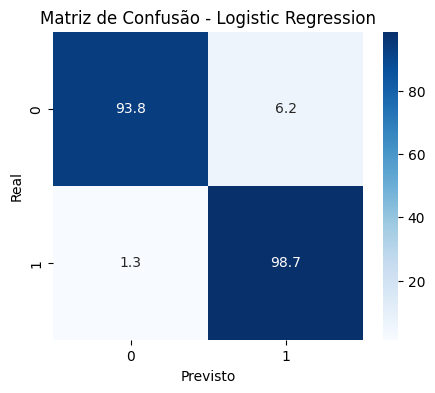

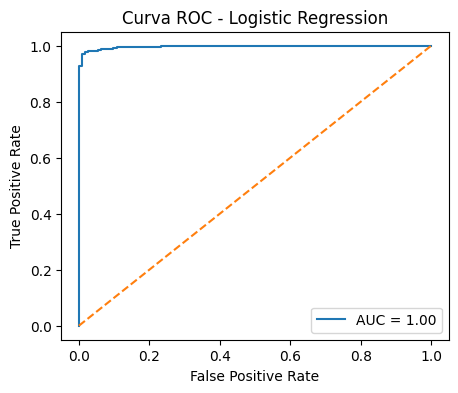

In [27]:
pipe_lr = pipeline_avaliacao(
    X_train, X_test, y_train, y_test,
    LogisticRegression(max_iter=1000, random_state=SEED),
    'Logistic Regression'
)

### 3.3.2. Gradient Boosting


===== Gradient Boosting =====

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       112
           1       1.00      1.00      1.00       311

    accuracy                           1.00       423
   macro avg       0.99      0.99      0.99       423
weighted avg       1.00      1.00      1.00       423



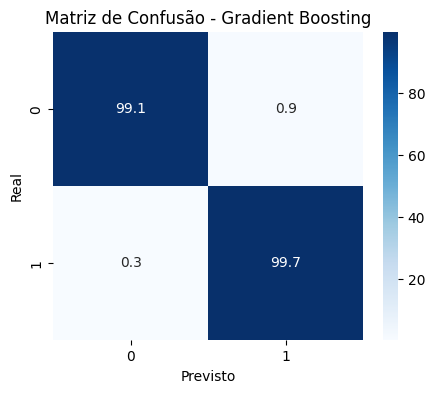

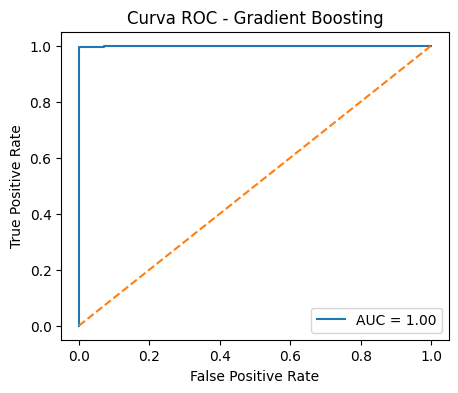

In [28]:
pipe_gb = pipeline_avaliacao(
    X_train, X_test, y_train, y_test,
    GradientBoostingClassifier(random_state=SEED),
    'Gradient Boosting'
)

### 3.3.3. Random Forest


===== Random Forest =====

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       112
           1       1.00      1.00      1.00       311

    accuracy                           1.00       423
   macro avg       0.99      0.99      0.99       423
weighted avg       1.00      1.00      1.00       423



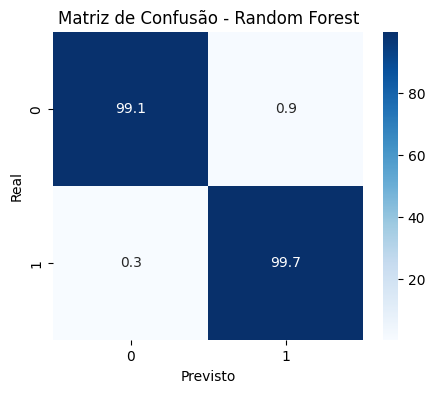

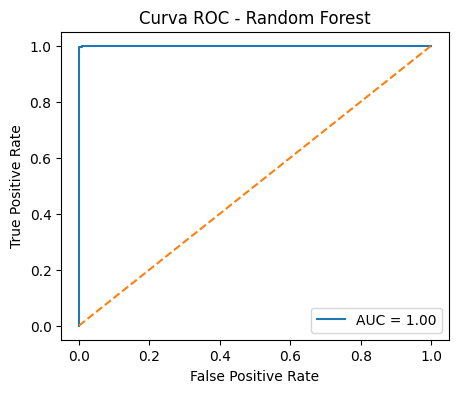

In [29]:
pipe_rf = pipeline_avaliacao(
    X_train, X_test, y_train, y_test,
    RandomForestClassifier(
        n_estimators=200,
        random_state=SEED,
        class_weight='balanced'
    ),
    'Random Forest'
)

### 3.3.4. Validação da função com teste externo - Random Forest

In [30]:
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=SEED,
        class_weight='balanced'
    ))
])

In [31]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessamento', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transf

In [32]:
y_pred = pipeline.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

Acurácia: 0.9952718676122931

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       112
           1       1.00      1.00      1.00       311

    accuracy                           1.00       423
   macro avg       0.99      0.99      0.99       423
weighted avg       1.00      1.00      1.00       423



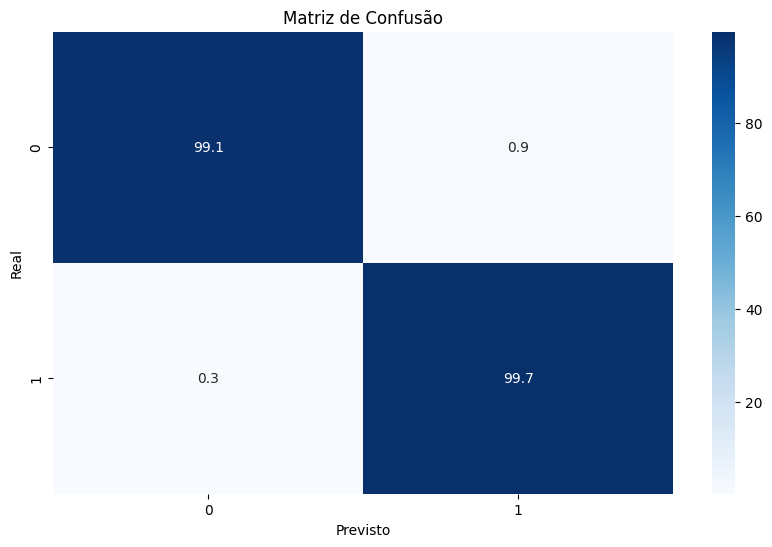

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(10,6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 3.3.5. Selecionando melhor modelo

In [34]:
# joblib
Path('models').mkdir(parents=True, exist_ok=True)
joblib.dump(pipe_rf, 'models/modelo_obesidade.pkl')

['models/modelo_obesidade.pkl']

In [35]:
df_tratado.columns

Index(['idade', 'altura', 'peso', 'imc', 'genero',
       'historico_familiar_sobrepeso', 'consumo_alimentos_caloricos',
       'fumante', 'monitora_calorias', 'consumo_vegetais', 'refeicoes_por_dia',
       'lanches_entre_refeicoes', 'consumo_agua_por_dia',
       'atividade_fisica_semana', 'tempo_eletronicos_por_dia',
       'consumo_alcoolico', 'meio_transporte', 'obesidade', 'risco_obesidade'],
      dtype='object')

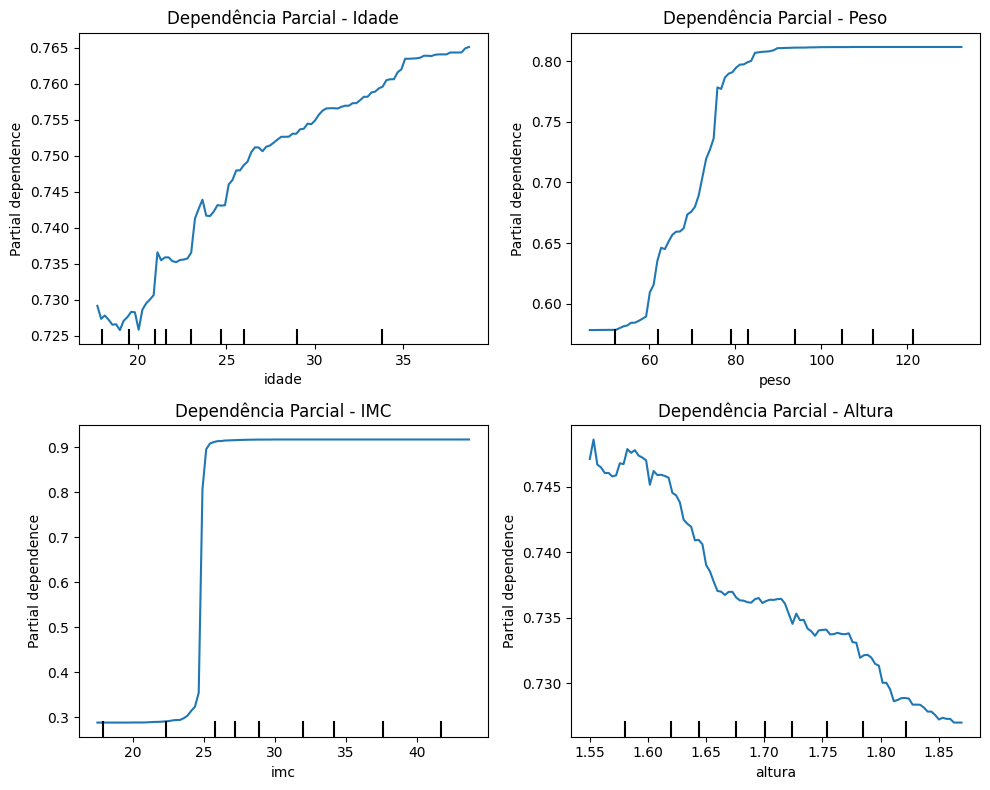

In [36]:
# Previsão média que o modelo varia quando se ajusta a uma variável de interesse
# Visualiza o efeito de idade, peso, imc e altura nas probabilidades previstas pelo modelo Random Forest.
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
PartialDependenceDisplay.from_estimator(pipe_rf, X_test, features=['idade'], ax=ax[0,0]); ax[0,0].set_title('Dependência Parcial - Idade')
PartialDependenceDisplay.from_estimator(pipe_rf, X_test, features=['peso'],  ax=ax[0,1]); ax[0,1].set_title('Dependência Parcial - Peso')
PartialDependenceDisplay.from_estimator(pipe_rf, X_test, features=['imc'],   ax=ax[1,0]); ax[1,0].set_title('Dependência Parcial - IMC')
PartialDependenceDisplay.from_estimator(pipe_rf, X_test, features=['altura'],ax=ax[1,1]); ax[1,1].set_title('Dependência Parcial - Altura')
plt.tight_layout(); 
plt.show()